In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
state_purchase_df = pd.read_excel('State Purchases.xlsx')

In [3]:
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

In [4]:
state_purchase_df.head()

,State,Weapons Purchase Amount,Tactical Equipment Purchase Amount,Vehicle Purchase Amount,Political Affiliation
0,Alabama,863051.39,4662372.17,5.790489e+07,Republican
1,Alaska,36724.00,199949.38,2.200000e+04,Republican
2,Arizona,296043.53,4717293.60,9.611555e+07,Republican
3,Arkansas,426267.10,1303714.63,2.841457e+07,Republican
4,California,2940742.92,10648080.72,1.012467e+08,Democrat


In [5]:
northeast_weapons_cost = 0
northeast_tactical_cost = 0
northeast_vehicle_cost = 0
for states in northeast:
    northeast_weapons_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Weapons Purchase Amount'].values
    northeast_tactical_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Tactical Equipment Purchase Amount'].values
    northeast_vehicle_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Vehicle Purchase Amount'].values

In [6]:
midwest_weapons_cost = 0
midwest_tactical_cost = 0
midwest_vehicle_cost = 0
for states in midwest:
    midwest_weapons_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Weapons Purchase Amount'].values
    midwest_tactical_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Tactical Equipment Purchase Amount'].values
    midwest_vehicle_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Vehicle Purchase Amount'].values

In [7]:
south_weapons_cost = 0
south_tactical_cost = 0
south_vehicle_cost = 0
for states in south:
    south_weapons_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Weapons Purchase Amount'].values
    south_tactical_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Tactical Equipment Purchase Amount'].values
    south_vehicle_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Vehicle Purchase Amount'].values

In [8]:
west_weapons_cost = 0
west_tactical_cost = 0
west_vehicle_cost = 0
for states in west:
    west_weapons_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Weapons Purchase Amount'].values
    west_tactical_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Tactical Equipment Purchase Amount'].values
    west_vehicle_cost += state_purchase_df.loc[state_purchase_df['State'] == states]['Vehicle Purchase Amount'].values

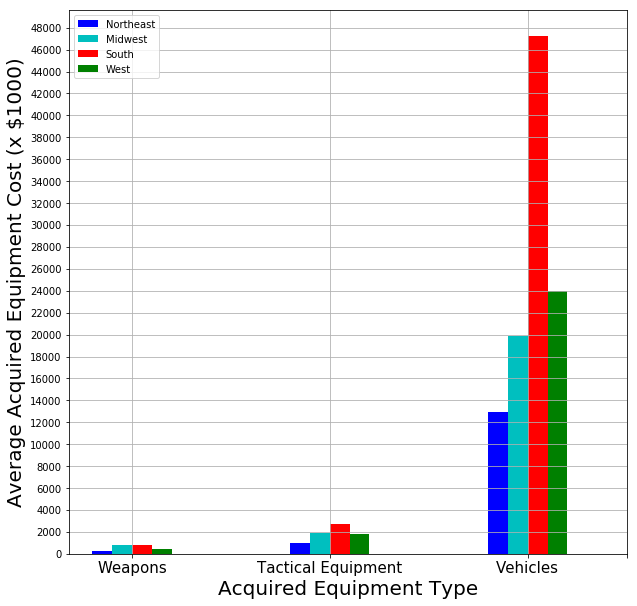

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
x_data = [.85, .95,1.05,1.15]
y_data_weapons = [northeast_weapons_cost[0]/1000/len(northeast),midwest_weapons_cost[0]/1000/len(midwest),south_weapons_cost[0]/1000/len(south),west_weapons_cost[0]/1000/len(west)]
colors = ['b', 'c', 'r', 'g']
ax.bar(x_data[0], y_data_weapons[0], .1, color = colors[0])
ax.bar(x_data[1], y_data_weapons[1], .1, color = colors[1])
ax.bar(x_data[2], y_data_weapons[2], .1, color = colors[2])
ax.bar(x_data[3], y_data_weapons[3], .1, color = colors[3])

x_data = [1.85, 1.95,2.05,2.15]
y_data_tactical = [northeast_tactical_cost[0]/1000/len(northeast),midwest_tactical_cost[0]/1000/len(midwest),south_tactical_cost[0]/1000/len(south),west_tactical_cost[0]/1000/len(west)]
ax.bar(x_data[0], y_data_tactical[0], .1, color = colors[0])
ax.bar(x_data[1], y_data_tactical[1], .1, color = colors[1])
ax.bar(x_data[2], y_data_tactical[2], .1, color = colors[2])
ax.bar(x_data[3], y_data_tactical[3], .1, color = colors[3])

#ax2 = ax.twinx()
x_data = [2.85, 2.95,3.05,3.15]
y_data_tactical = [northeast_vehicle_cost[0]/1000/len(northeast),midwest_vehicle_cost[0]/1000/len(midwest),south_vehicle_cost[0]/1000/len(south),west_vehicle_cost[0]/1000/len(west)]
ax.bar(x_data[0], y_data_tactical[0], .1, color = colors[0])
ax.bar(x_data[1], y_data_tactical[1], .1, color = colors[1])
ax.bar(x_data[2], y_data_tactical[2], .1, color = colors[2])
ax.bar(x_data[3], y_data_tactical[3], .1, color = colors[3])


ax.set_xticks([1,2,3,3.5])
ax.set_xticklabels(('Weapons', 'Tactical Equipment', 'Vehicles'), fontsize = 15)
ax.legend(['Northeast', 'Midwest', 'South', 'West'], loc = 'upper left')
ax.set_xlabel('Acquired Equipment Type', fontsize = 20)
ax.set_ylabel('Average Acquired Equipment Cost (x $1000)', fontsize = 20)
ax.set_yticks(list(range(0, 50000, 2000)))
ax.grid()
plt.show()

In [10]:
repub_weapons_cost = 0
repub_tactical_cost = 0
repub_vehicle_cost = 0

demo_weapons_cost = 0
demo_tactical_cost = 0
demo_vehicle_cost = 0
num_rub = 0
num_dem = 0
for ind, states in state_purchase_df.iterrows():
    if states['Political Affiliation'] == 'Republican':
        repub_weapons_cost += states['Weapons Purchase Amount']
        repub_tactical_cost += states['Tactical Equipment Purchase Amount']
        repub_vehicle_cost += states['Vehicle Purchase Amount']
        num_rub += 1
    if states['Political Affiliation'] == 'Democrat':
        demo_weapons_cost += states['Weapons Purchase Amount']
        demo_tactical_cost += states['Tactical Equipment Purchase Amount']
        demo_vehicle_cost += states['Vehicle Purchase Amount'] 
        num_dem += 1

In [11]:
num_rub,num_dem

(30, 21)

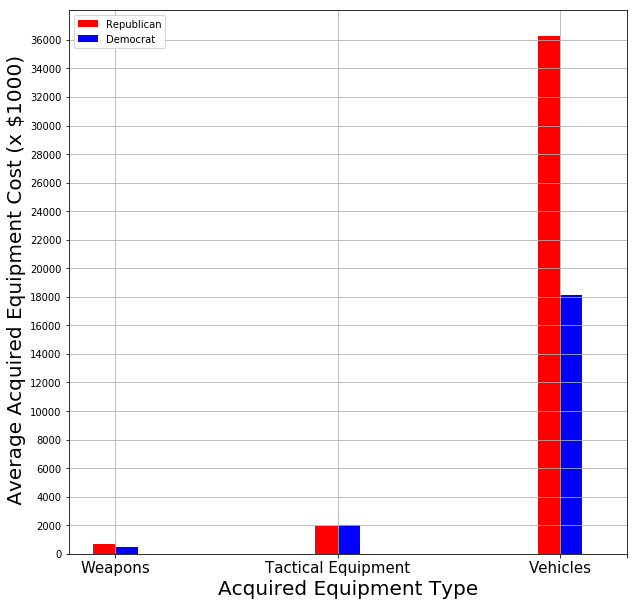

In [22]:
fig, ax = plt.subplots(figsize = (10,10))
x_data = [.95,1.05]
y_data_weapons = [repub_weapons_cost/1000/num_rub, demo_weapons_cost/1000/num_dem]
colors = ['r', 'b']
ax.bar(x_data[0], y_data_weapons[0], .1, color = colors[0])
ax.bar(x_data[1], y_data_weapons[1], .1, color = colors[1])


x_data = [1.95,2.05]
y_data_tactical = [repub_tactical_cost/1000/num_rub, demo_tactical_cost/1000/num_dem]
colors = ['r', 'b']
ax.bar(x_data[0], y_data_tactical[0], .1, color = colors[0])
ax.bar(x_data[1], y_data_tactical[1], .1, color = colors[1])

x_data = [2.95,3.05]
y_data_vehicle = [repub_vehicle_cost/1000/num_rub, demo_vehicle_cost/1000/num_dem]
colors = ['r', 'b']
ax.bar(x_data[0], y_data_vehicle[0], .1, color = colors[0])
ax.bar(x_data[1], y_data_vehicle[1], .1, color = colors[1])


ax.set_xticks([1,2,3, 3.3])
ax.set_xticklabels(('Weapons', 'Tactical Equipment', 'Vehicles'), fontsize = 15)
ax.legend(['Republican','Democrat'], loc = 'upper left')
ax.set_xlabel('Acquired Equipment Type', fontsize = 20)
ax.set_ylabel(' Average Acquired Equipment Cost (x $1000)', fontsize = 20)
ax.set_yticks(list(range(0, 37000, 2000)))
ax.grid()
plt.show()